In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import keras

Using TensorFlow backend.


In [2]:
num_features = 20
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=num_features, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)

# create scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)

# fit scaler on training dataset
scaler.fit(trainX)
# transform training dataset
trainX = scaler.transform(trainX)
# transform test dataset
testX = scaler.transform(testX)

In [3]:
df = pd.DataFrame(trainy, columns=['y'])
df['lab']=np.where(df.y.shift(-1)>df.y,1,0) #like price prediction
trainy=df.lab.fillna(0).values
df = pd.DataFrame(testy, columns=['y'])
df['lab']=np.where(df.y.shift(-1)>df.y,1,0) #like price prediction
testy=df.lab.fillna(0).values

Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 339us/step - loss: 0.9822 - acc: 0.6140 - val_loss: 0.7109 - val_acc: 0.5960
Epoch 2/100
500/500 [==============================] - ETA: 0s - loss: 0.7202 - acc: 0.625 - 0s 42us/step - loss: 0.7317 - acc: 0.5880 - val_loss: 0.6819 - val_acc: 0.6740
Epoch 3/100
500/500 [==============================] - 0s 42us/step - loss: 0.6836 - acc: 0.7160 - val_loss: 0.6826 - val_acc: 0.6940
Epoch 4/100
500/500 [==============================] - 0s 39us/step - loss: 0.6776 - acc: 0.7400 - val_loss: 0.6776 - val_acc: 0.7040
Epoch 5/100
500/500 [==============================] - 0s 40us/step - loss: 0.6767 - acc: 0.7320 - val_loss: 0.6793 - val_acc: 0.6800
Epoch 6/100
500/500 [==============================] - 0s 40us/step - loss: 0.6770 - acc: 0.6940 - val_loss: 0.6793 - val_acc: 0.6740
Epoch 7/100
500/500 [==============================] - 0s 40us/step - loss: 0.6773 - acc: 0.6820 - val_loss: 0.

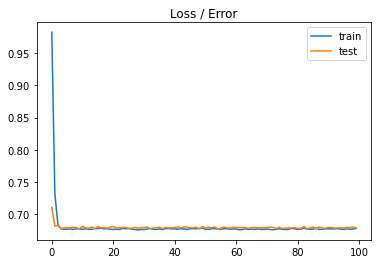

In [4]:
# logistic regression with scaled inputs outputs on the regression problem
# define model
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid', kernel_initializer='he_uniform', kernel_regularizer= keras.regularizers.L1L2(l1=0.0, l2=1)))
#compile model
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)
# evaluate the model
train_e = model.evaluate(trainX, trainy, verbose=1)
test_e = model.evaluate(testX, testy, verbose=1)
print('Train loss: %.3f, Test loss: %.3f' % (train_e[0], test_e[0])) 
print('Train metric: %.3f, Test metric: %.3f' % (train_e[1], test_e[1])) 
#plot loss during training
plt.title('Loss / Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()